In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions_EDA import *

In [2]:
# Cargar datos
url = 'df_limpio.csv'
df = cargar_datos(url)

# Mostrar las primeras filas del DataFrame para ver cómo se cargaron los datos
df.head()

,sex,age,level_education,country,year,value_unemployment,value_education
0,Females,15-29,ESO,Austria,2014,15.7,27.9
1,Females,15-29,ESO,Austria,2015,15.3,27.5
2,Females,15-29,ESO,Austria,2016,17.1,27.3
3,Females,15-29,ESO,Austria,2017,16.8,27.2
4,Females,15-29,ESO,Austria,2018,13.4,27.1


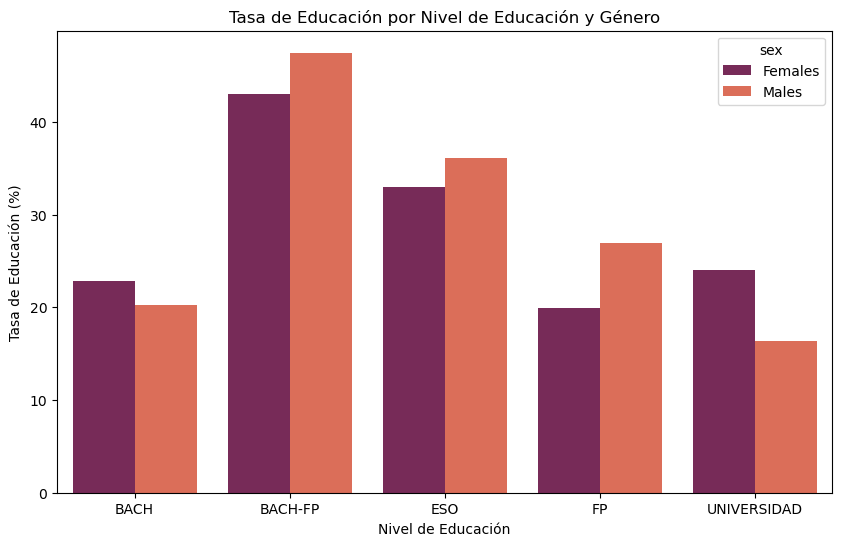

In [19]:
# Tasa de educación por nivel de educación y género
df_filtrado = df[df["sex"] != 'Total']
grupo_genero_educacion = df_filtrado.groupby(["level_education", "sex"])["value_education"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x = "level_education", y = "value_education", hue = "sex", data = grupo_genero_educacion, palette = "rocket")

plt.title('Tasa de Educación por Nivel de Educación y Género')
plt.ylabel('Tasa de Educación (%)')
plt.xlabel('Nivel de Educación')

# Mostrar el gráfico
plt.show()

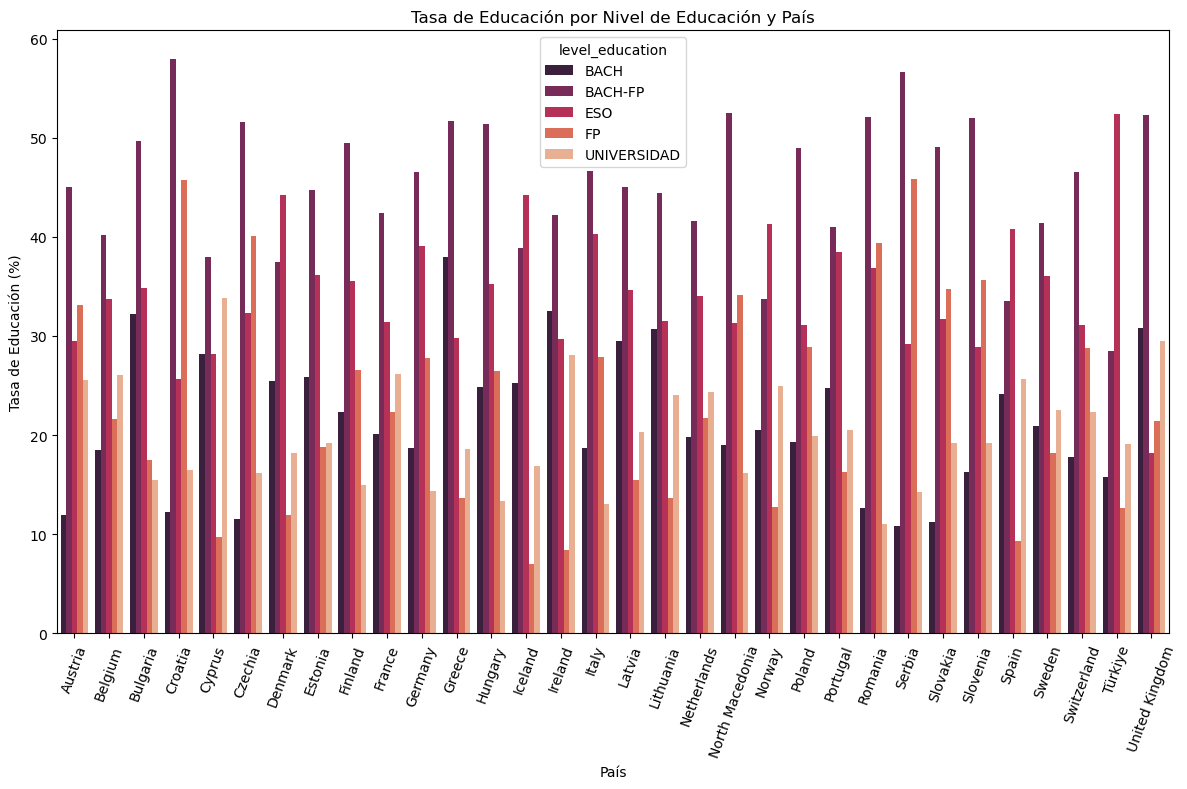

In [43]:

grupo_pais_genero_educacion = df_filtrado.groupby(["country", "level_education"])["value_education"].mean().reset_index()

# Paso 2: Crear el gráfico de barras agrupadas por país, género y nivel de educación
plt.figure(figsize = (12, 8))
sns.barplot(x = "country", y = "value_education", hue = "level_education", data = grupo_pais_genero_educacion, palette = "rocket", errorbar = None)

# Añadir títulos y etiquetas
plt.title('Tasa de Educación por Nivel de Educación y País')
plt.ylabel('Tasa de Educación (%)')
plt.xlabel('País')

# Mostrar el gráfico
plt.xticks(rotation = 70)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.tight_layout()
plt.show()

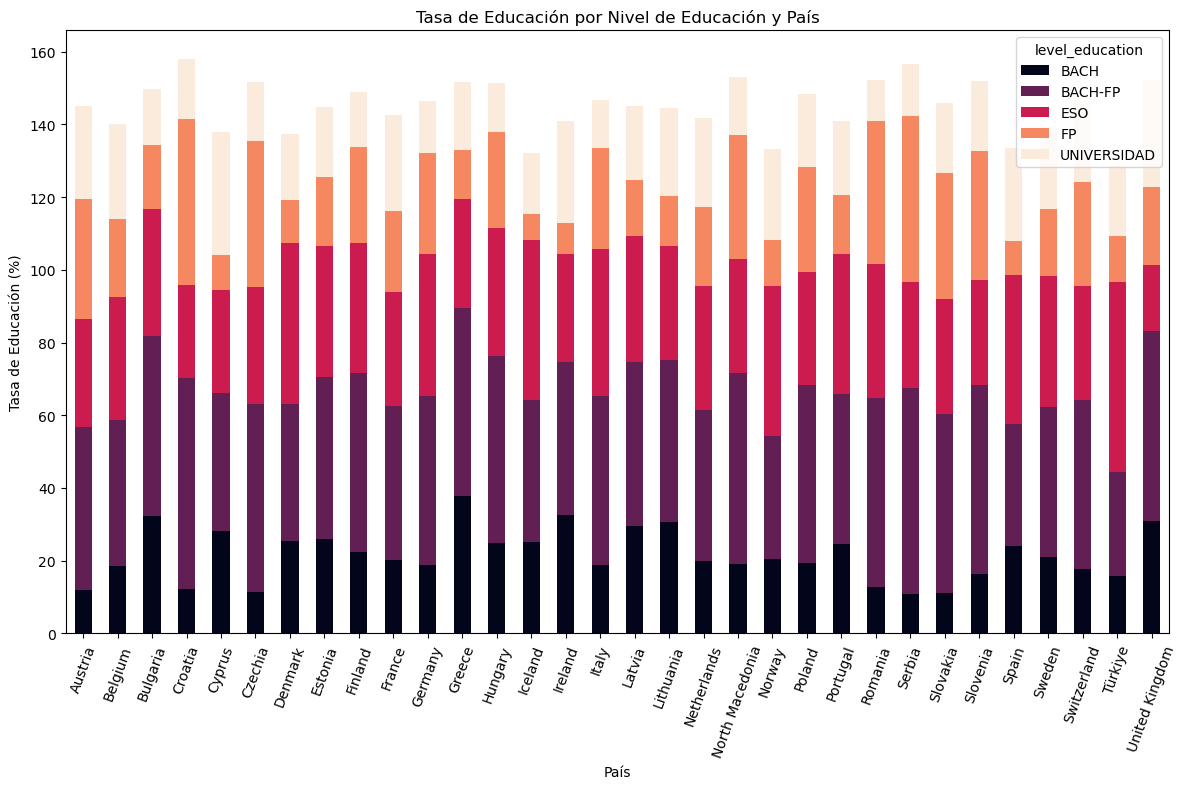

In [44]:
grupo_pais_genero_educacion = df_filtrado.groupby(["country", "level_education"])["value_education"].mean().unstack().fillna(0)

# Paso 1: Crear el gráfico de barras apiladas
ax = grupo_pais_genero_educacion.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='rocket')

# Añadir títulos y etiquetas
plt.title('Tasa de Educación por Nivel de Educación y País')
plt.ylabel('Tasa de Educación (%)')
plt.xlabel('País')

# Ajustar la visibilidad de las etiquetas del eje x
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

c:\Users\Bapa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


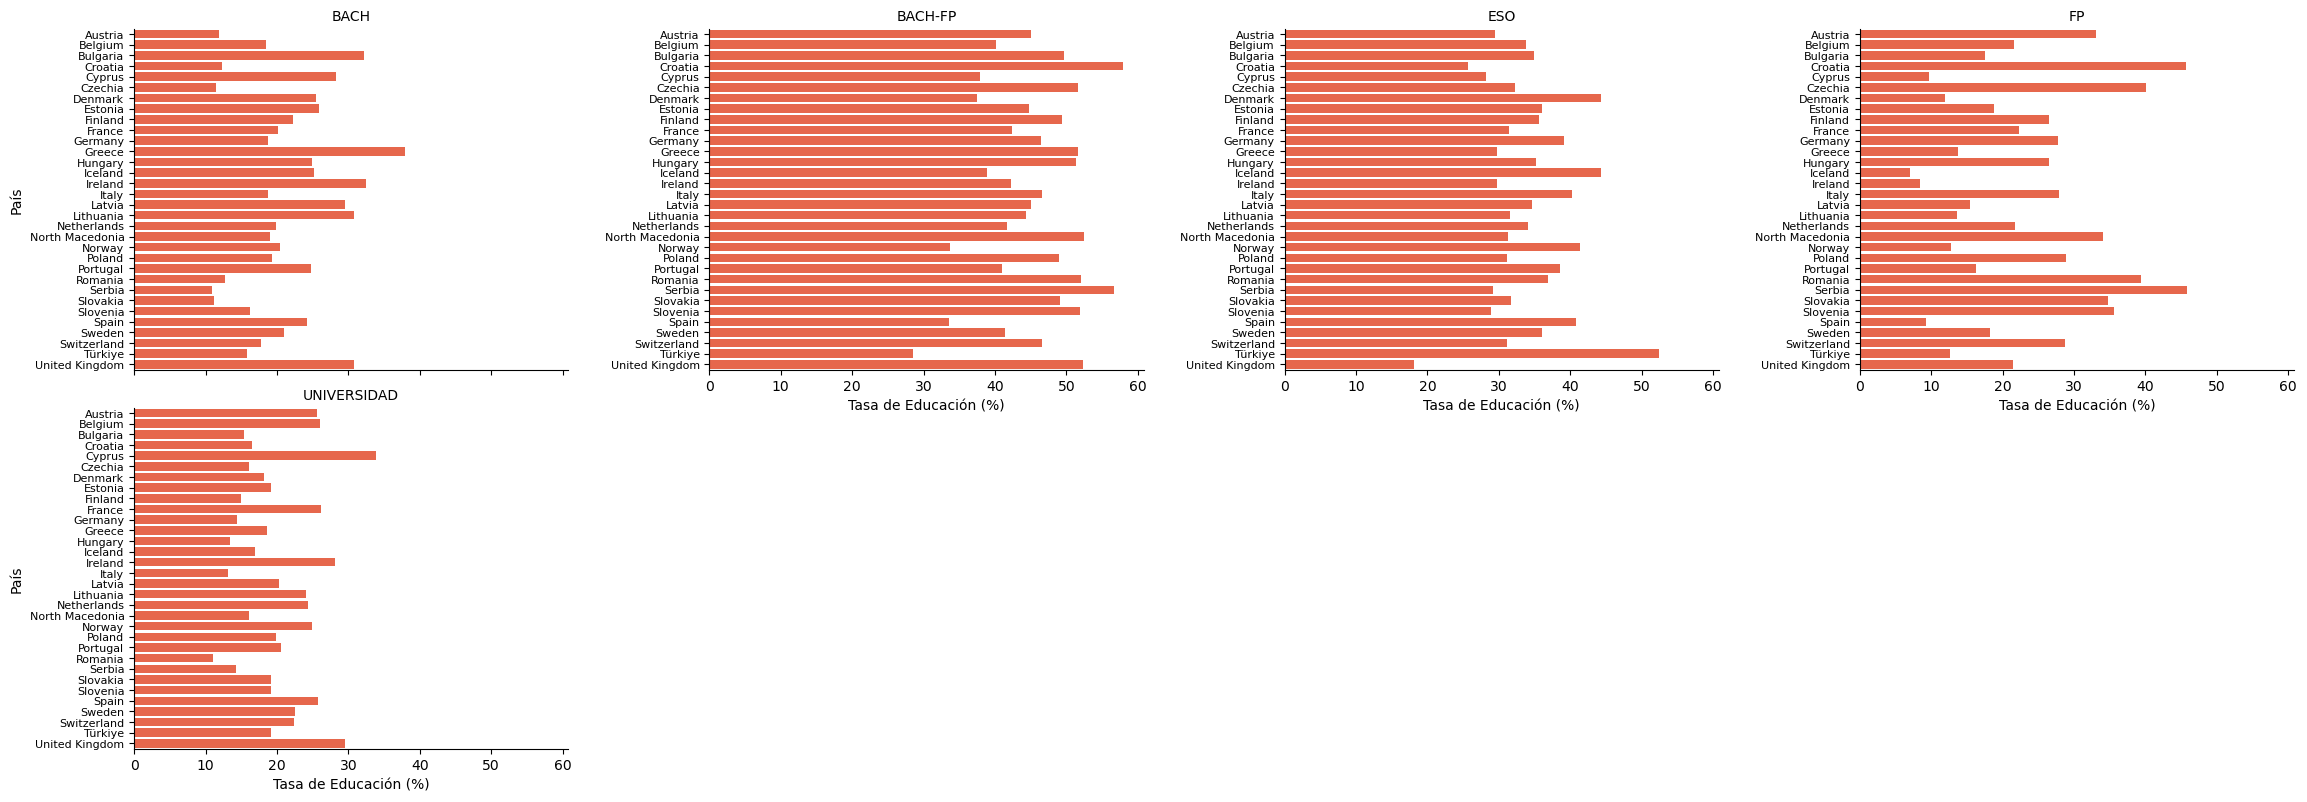

In [58]:
g = sns.FacetGrid(grupo_pais_genero_educacion, col="level_education", col_wrap=4, height=6, sharey=False, palette="rocket")
g.map(sns.barplot, "value_education", "country", orient="h")

# Ajustar el tamaño de la figura y el espaciado entre facetas
plt.subplots_adjust(left = 0.05, right = 0.95, top = 0.9, bottom = 0.3)

# Añadir títulos y etiquetas
g.set_titles("{col_name}")
g.set_axis_labels("Tasa de Educación (%)", "País")

# Ajustar el tamaño de fuente de las etiquetas
for ax in g.axes.flatten():
    ax.tick_params(axis='y', labelsize = 8)

plt.show()

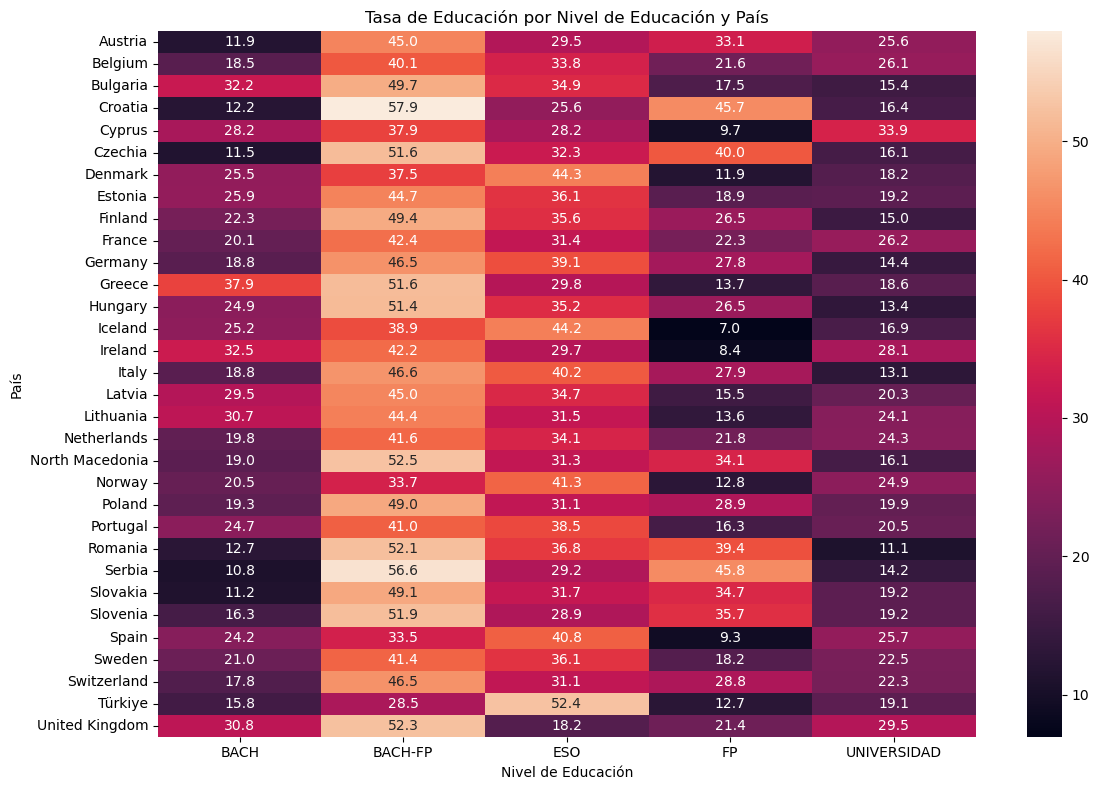

In [49]:
heatmap_data = df_filtrado.pivot_table(index="country", columns="level_education", values="value_education")

# Paso 1: Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="rocket", annot=True, fmt=".1f")

# Añadir títulos y etiquetas
plt.title('Tasa de Educación por Nivel de Educación y País')
plt.xlabel('Nivel de Educación')
plt.ylabel('País')
plt.tight_layout()
plt.show()

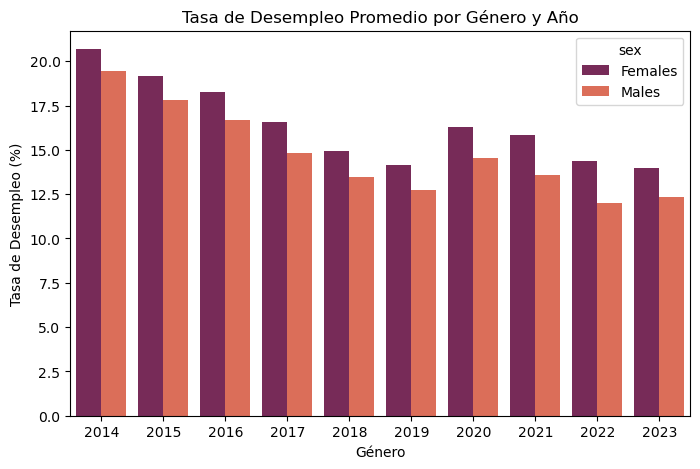

In [32]:
grupo_genero_desempleo_year = df_filtrado.groupby(["sex", "year"])["value_unemployment"].mean().reset_index()

# Paso 3: Crear el gráfico de barras para el porcentaje de desempleo por género
plt.figure(figsize = (8, 5))
sns.barplot(x = "year", y = "value_unemployment", hue = "sex", data = grupo_genero_desempleo_year, palette = "rocket")

# Añadir títulos y etiquetas
plt.title('Tasa de Desempleo Promedio por Género y Año')
plt.ylabel('Tasa de Desempleo (%)')
plt.xlabel('Género')

# Mostrar el gráfico
plt.show()

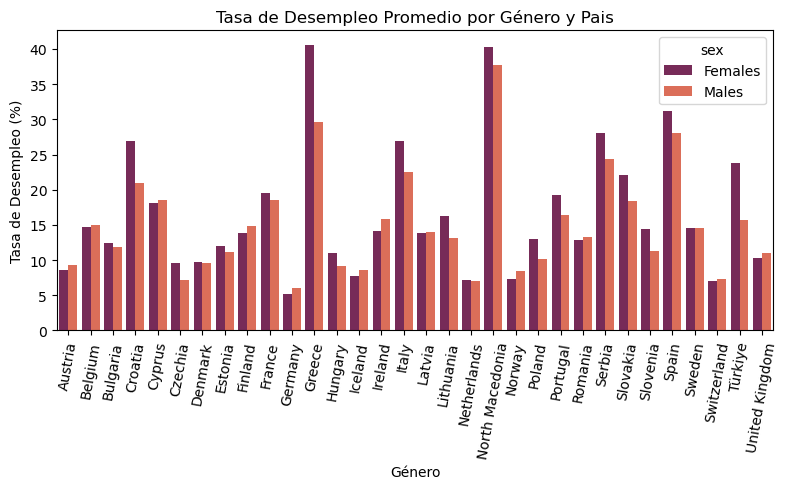

In [33]:
grupo_genero_desempleo_country = df_filtrado.groupby(["sex", "country"])["value_unemployment"].mean().reset_index()

# Paso 3: Crear el gráfico de barras para el porcentaje de desempleo por género
plt.figure(figsize = (8, 5))
sns.barplot(x = "country", y = "value_unemployment", hue = "sex", data = grupo_genero_desempleo_country, palette = "rocket")

# Añadir títulos y etiquetas
plt.title('Tasa de Desempleo Promedio por Género y Pais')
plt.ylabel('Tasa de Desempleo (%)')
plt.xlabel('Género')
plt.xticks(rotation = 80)
plt.tight_layout()
# Mostrar el gráfico
plt.show()

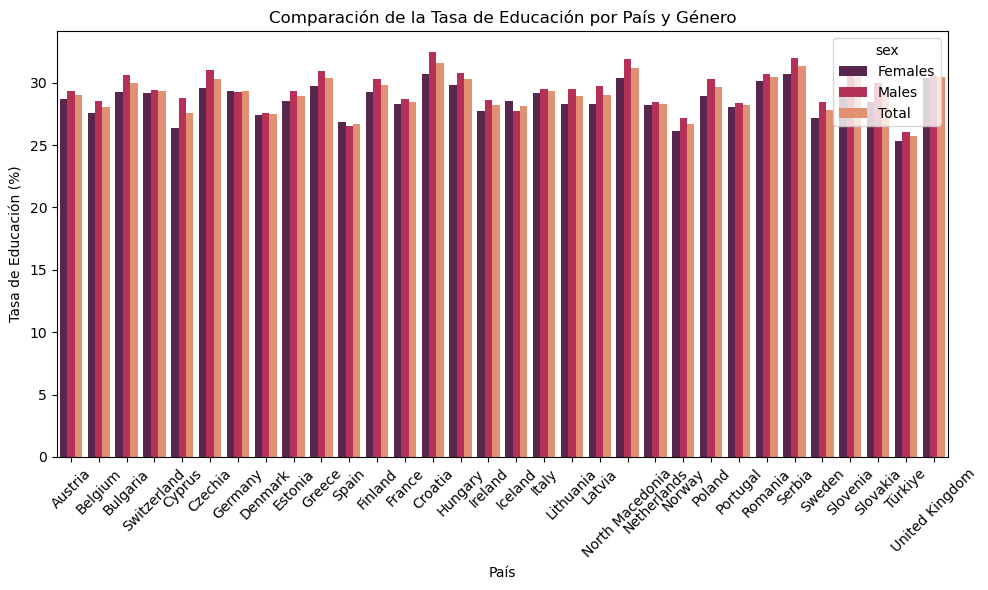

In [18]:
# 2. Gráfico de barras: Comparación de la tasa de educación por país y género
plt.figure(figsize = (10, 6))
sns.barplot(x = 'country', y = 'value_education', hue = 'sex', data = df, errorbar = None, palette = "rocket")
plt.title('Comparación de la Tasa de Educación por País y Género')
plt.ylabel('Tasa de Educación (%)')
plt.xlabel('País')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

C:\Users\Bapa\AppData\Local\Temp\ipykernel_18756\3593142004.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x="country", y="value_unemployment", hue="sex", data=df, palette=custom_palette, errorbar = None)


Text(0.5, 0, 'País')

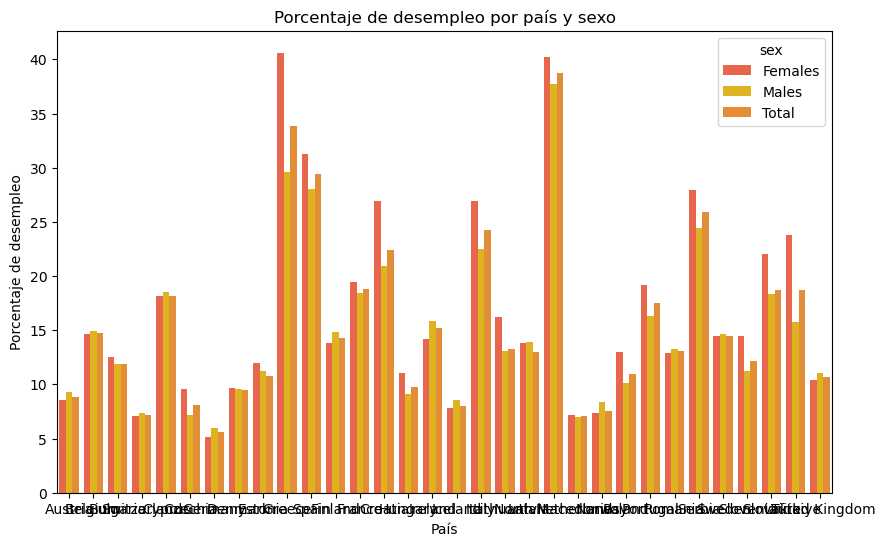

In [14]:
# Gráfico de barras agrupadas para comparar porcentaje de desempleo entre hombres y mujeres por país
plt.figure(figsize=(10, 6))
sns.barplot(x="country", y="value_unemployment", hue="sex", data=df, palette=custom_palette, errorbar = None)
plt.title("Porcentaje de desempleo por país y sexo")
plt.ylabel("Porcentaje de desempleo")
plt.xlabel("País")
